In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned copy.csv')

In [5]:
base_stroke = 4
df['RiskofStroke'] = df['HadStroke'] * base_stroke

In [7]:
base_heart_attack = 3
df['RiskofHeartAttack'] = df['HadHeartAttack'] * base_heart_attack

In [8]:
base_angina = 2
df['RiskofAngina'] = df['HadAngina'] * base_angina

In [9]:
df['MiniRiskScore'] = (
    df['RiskofStroke'] +
    df['RiskofHeartAttack'] +
    df['RiskofAngina']
)
df.to_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned copy.csv')

In [10]:
columns_to_drop = ['TotalRiskScore', 'HeartAttackRisk', 'COPDRisk', 'BlindRisk', 'DepressiveRisk', 'WalkingRisk', 'KidneyRisk', 'DiabetesRisk', 'SkinCancerRisk', 'DeafRisk', 'SmokerPoints', 'ECigPoints']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,CalculatedBMI,RiskofStroke,RiskofHeartAttack,RiskofAngina,MiniRiskScore
0,alabama,female,very good,0.0,0.0,within past year (anytime less than 12 months ...,0,8.0,none of them,0,...,1,0,"yes, received tetanus shot but not sure what type",0,0,27.353965,0,0,0,0
1,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,0,6.0,none of them,0,...,0,0,"no, did not receive any tetanus shot in the pa...",0,0,26.578125,0,0,0,0
2,alabama,female,very good,2.0,3.0,within past year (anytime less than 12 months ...,1,5.0,none of them,0,...,0,0,"no, did not receive any tetanus shot in the pa...",0,1,25.761694,0,0,0,0
3,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,1,7.0,none of them,0,...,1,1,"no, did not receive any tetanus shot in the pa...",0,0,23.324151,0,0,0,0
4,alabama,female,fair,2.0,0.0,within past year (anytime less than 12 months ...,1,9.0,none of them,0,...,0,1,"no, did not receive any tetanus shot in the pa...",0,0,21.899469,0,0,0,0


In [12]:
df['TrueHealth'] = "default_value"

In [13]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,CalculatedBMI,RiskofStroke,RiskofHeartAttack,RiskofAngina,MiniRiskScore,TrueHealth
0,alabama,female,very good,0.0,0.0,within past year (anytime less than 12 months ...,0,8.0,none of them,0,...,0,"yes, received tetanus shot but not sure what type",0,0,27.353965,0,0,0,0,default_value
1,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,0,6.0,none of them,0,...,0,"no, did not receive any tetanus shot in the pa...",0,0,26.578125,0,0,0,0,default_value
2,alabama,female,very good,2.0,3.0,within past year (anytime less than 12 months ...,1,5.0,none of them,0,...,0,"no, did not receive any tetanus shot in the pa...",0,1,25.761694,0,0,0,0,default_value
3,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,1,7.0,none of them,0,...,1,"no, did not receive any tetanus shot in the pa...",0,0,23.324151,0,0,0,0,default_value
4,alabama,female,fair,2.0,0.0,within past year (anytime less than 12 months ...,1,9.0,none of them,0,...,1,"no, did not receive any tetanus shot in the pa...",0,0,21.899469,0,0,0,0,default_value


In [15]:
df.to_csv('UpdatedHeart_Copy.csv', index=False)

# attempting the ml model

the model needs to be an unsupervised learning model as there is no data in the target column ('TrueHealth') to train the model.

the model chosen is the K-Means model, a type of clustering model that divides the data into k number of clusters by minimising the distance to the cluster centroid.

because there are five distinct values of ['TrueHealth'] that we are trying to sort the ['MiniRiskScore'] into, we are setting k = 5. 

we are using K-Means rather than a programmed code with pre-set boundaries as we believe that clustering is more efficient, due to it taking into consideration where the points are plotted. 

# a quick explanation of the model

the model randomly selects k number of different data points that we can call the initial cluster points. it then measures the distance between each data point and each intial cluster point.

the model then assigns each data point to the nearest cluster point. the next step is to calculate the mean of each cluster, and then the model repeats the previous measuring and assigning processes using the calculated average point instead of the initial cluster point.

an important parameter to note here is the 'n_init' parameter, which specifies the number of times the model repeats the above process with different initial cluster points, or centroid seeds. the default value is 10 as for most datasets this number of runs is sufficient to get good results, but we will first code to find the optimal 'n_init' value for our model before coding for the model itself.

In [ ]:
# installing libraries
%pip install pandas numpy scikit-learn matplotlib

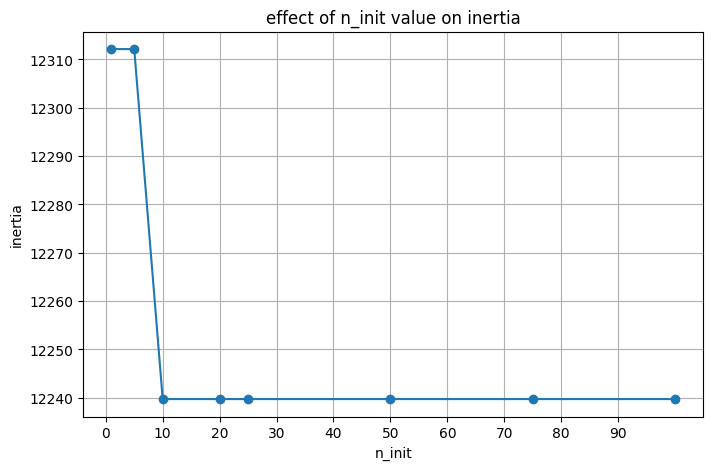

In [18]:
# this code gets the optimal 'n_init' value by measuring inertia across different 'n_init' values.
# inertia is the sum of squared distances (SSD) from each data point to the nearest cluster center.

# importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# read the dataset
df = pd.read_csv('/Users/nikgurunathan/Desktop/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned_copy.csv')
data = df[['MiniRiskScore']]

# testing different 'n_init' values
n_init_values = [1, 5, 10, 20, 25, 50, 75, 100]
inertia_values = []

for n in n_init_values:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=n).fit(data)
    inertia_values.append(kmeans.inertia_)

# plotting inertia vs 'n_init' values
plt.figure(figsize=(8,5))
plt.plot(n_init_values, inertia_values, marker='o')
plt.xticks(np.arange(0,100,10))
plt.xlabel("n_init")
plt.ylabel("inertia")
plt.title("effect of n_init value on inertia")
plt.grid(True)
plt.show()

as seen in the graph above, because there is no significant change in inertia after n_init = 10, we can use that as our optimal n_init value for the model.

In [19]:
# actually coding the model
column = df['MiniRiskScore']
miniriskscore_2d = column.values.reshape(-1,1) # changing it to a 2D array

kmeans_minirs = KMeans(n_clusters=5, random_state=42, n_init=10).fit(miniriskscore_2d)

labels = kmeans_minirs.labels_

status_mapping = {
    0: "excellent",
    1: "very good",
    2: "good",
    3: "fair",
    4: "poor"
}
health_statuses = [status_mapping[label] for label in labels]

df['MiniTrueHealth'] = health_statuses

print(df[['MiniRiskScore', 'MiniTrueHealth']].head())

print(df['MiniTrueHealth'].value_counts())

df.to_csv('/Users/nikgurunathan/Desktop/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned_copy.csv', index=False)

   MiniRiskScore MiniTrueHealth
0              0      very good
1              0      very good
2              0      very good
3              0      very good
4              0      very good
MiniTrueHealth
very good    392507
excellent     23336
fair          12845
poor          11138
good           4936
Name: count, dtype: int64


In [21]:
# actually coding the model
column = df['MiniRiskScore']
miniriskscore_2d = column.values.reshape(-1,1) # changing it to a 2D array

kmeans_minirs = KMeans(n_clusters=5, random_state=42, n_init=10).fit(miniriskscore_2d)

labels = kmeans_minirs.labels_

centroids = kmeans_minirs.cluster_centers_.flatten()

sorted_labels = np.argsort(centroids)

label_mapping = {original: sorted for sorted, original in enumerate(sorted_labels)}

remapped_labels = [label_mapping[label] for label in labels]

status_mapping = {
    0: "good",
    1: "excellent",
    2: "poor",
    3: "very good",
    4: "fair"
}
health_statuses = [status_mapping[label] for label in labels]

df['MiniTrueHealth'] = health_statuses

print(df[['MiniRiskScore', 'MiniTrueHealth']].head())

print(df['MiniTrueHealth'].value_counts())

df.to_csv('/Users/nikgurunathan/Desktop/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned_copy.csv', index=False)

   MiniRiskScore MiniTrueHealth
0              0      excellent
1              0      excellent
2              0      excellent
3              0      excellent
4              0      excellent
MiniTrueHealth
excellent    392507
good          23336
very good     12845
fair          11138
poor           4936
Name: count, dtype: int64


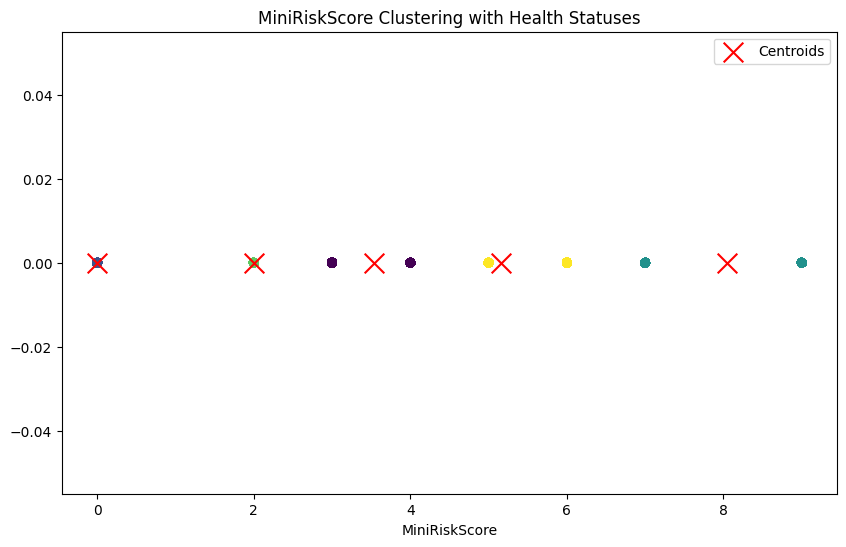

In [11]:
# Plot the MiniRiskScore against the assigned health status
plt.figure(figsize=(10, 6))
plt.scatter(df['MiniRiskScore'], np.zeros_like(df['MiniRiskScore']), c=labels, cmap='viridis', marker='o')

# Add centroids to the plot
centroids = kmeans_minirs.cluster_centers_
plt.scatter(centroids, np.zeros_like(centroids), color='red', marker='x', s=200, label='Centroids')

# Customize the plot
plt.xlabel('MiniRiskScore')
plt.title('MiniRiskScore Clustering with Health Statuses')
plt.legend()
plt.show()
